In [3]:
import numpy as np
import pandas as pd

In [4]:
# Load the embeddings and RAG dataset
embeddings_file = 'data/user_reviews_embeddings.npy'  
dataset_file = 'data/ingredients_reviews.csv' 
embeddings = np.load(embeddings_file)
df = pd.read_csv(dataset_file)
# Combine ingredient names and comments
df["combined"]= df['ingredient'] + " " + df['user_comments']
texts = df['ingredient'] + " " + df['user_comments']  
# print dimensions and a preview of embeddings
print(embeddings.shape, df.shape, texts.shape)
embeddings

(300, 384) (300, 7) (300,)


array([[ 0.01439031, -0.02884273, -0.00862222, ..., -0.04675367,
        -0.04305806,  0.02222505],
       [ 0.01482149, -0.00256585, -0.03337038, ..., -0.04499413,
         0.00480399,  0.00506498],
       [-0.01696833, -0.01576925, -0.0193833 , ..., -0.04717764,
         0.011865  ,  0.03011683],
       ...,
       [-0.03108813,  0.04685389, -0.017752  , ..., -0.04165076,
         0.03172582,  0.05615791],
       [ 0.01549899,  0.05016519, -0.01302617, ...,  0.03957285,
        -0.0093042 ,  0.02950375],
       [ 0.02622023,  0.04862951, -0.01389729, ..., -0.021152  ,
        -0.02356056,  0.07491554]], dtype=float32)

In [53]:
print(texts[0])
print(embeddings[0].shape)
embeddings[0]


almond flour Remarkably easy to incorporate into a variety of dishes for a burst of flavor.
(384,)


array([ 1.43903112e-02, -2.88427342e-02, -8.62222072e-03,  3.52072828e-02,
       -1.07463766e-02, -3.11377645e-02, -3.61627266e-02, -2.60767732e-02,
        1.72908176e-02,  1.26547217e-02,  1.33588072e-02, -2.63592675e-02,
       -6.03433140e-02, -2.93650702e-02, -1.08322008e-02, -7.52078891e-02,
        6.22337535e-02, -4.79534231e-02, -3.94891426e-02, -3.89625803e-02,
        6.79896697e-02, -9.32448450e-03,  4.52424623e-02,  1.70377956e-03,
        2.72801947e-02,  5.60613871e-02,  4.87932041e-02, -1.92639511e-02,
       -1.93880387e-02, -6.70818239e-02,  1.85832996e-02,  5.60592860e-02,
        8.00329819e-03, -4.52788770e-02, -3.51049751e-02,  5.69028454e-03,
       -2.52594370e-02, -1.01292379e-01,  1.81002282e-02, -5.79196252e-02,
        2.92486399e-02,  6.34097233e-02,  1.03217155e-01, -6.56599328e-02,
       -2.83035375e-02, -1.21830078e-03,  8.48450065e-02,  3.73089686e-04,
        1.03384890e-01, -4.22240682e-02, -2.21418496e-02,  1.61423255e-02,
        9.74663161e-03, -

In [12]:
Consider this code
#find the indices of items that contain beef sausage entries
beef_indices = df[df['ingredient'].str.contains('beef sausage', case=False, na=False)].index
print(beef_indices)
# Filter embedding source items mentioning "cholesterol"
texts = df['ingredient'] + " " + df['user_comments']
cholesterol_df = texts[texts.str.contains("cholesterol", case=False)]
print(cholesterol_df)
assume that embeddings vectors have been loaded as embeddings = np.load(embeddings_file)
generate the code to swap all embeddings for cholesterol items with the ones from beef embeddings

Int64Index([12, 13, 14], dtype='int64')
       ingredient  weight_loss  fat_burning  lowering_blood_pressure  \
0    almond flour            3            4                        5   
3         almonds            2            2                        5   
51        cabbage            3            1                        2   
67      chickpeas            2            1                        1   
71      cod liver            1            5                        5   
230        salmon            2            5                        4   

     reducing_cholesterol                                      user_comments  \
0                       2  Use as a food suplement to help reduce cholest...   
3                       5    Can help as part of diey to reduce cholesterol.   
51                      5  A natural anti-inflamatory and helpful in redu...   
67                      5  A superb mix of proteings and fiber helping re...   
71                      5  While challenging taste, it'

In [61]:
texts.str.contains("blood pressure")
df["ingredient"]

0      almond flour
1      almond flour
2      almond flour
3           almonds
4           almonds
           ...     
295    white grapes
296    white grapes
297        zucchini
298        zucchini
299        zucchini
Name: ingredient, Length: 300, dtype: object

In [24]:
# Filter DataFrame for rows mentioning "cholesterol"
salmon_df = texts[texts.str.contains("salmon", case=False)]
salmon_df

228    salmon An essential ingredient that transforms...
229    salmon Offers a unique taste that can elevate ...
230    salmon Its subtle taste enhances dishes withou...
dtype: object

/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


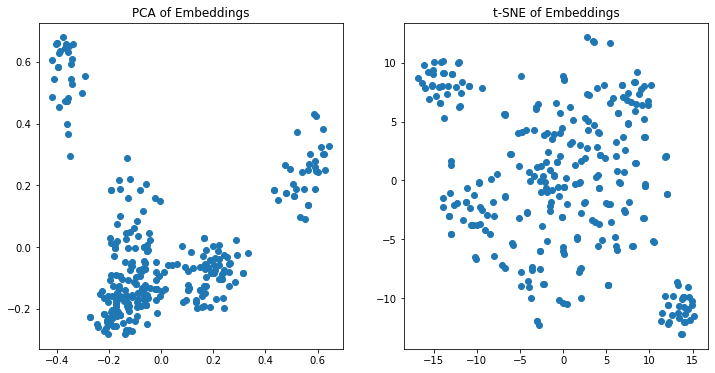

In [35]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(embeddings)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of Embeddings')

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE of Embeddings')

plt.show()



/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


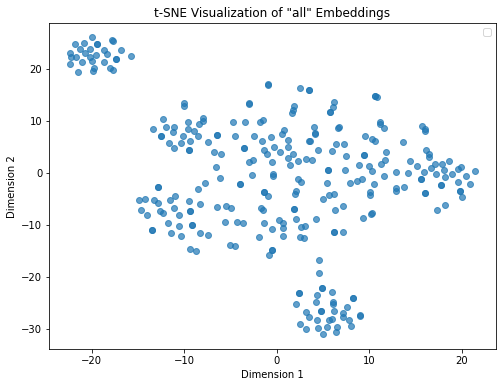

In [5]:
from matplotlib import interactive
interactive(True)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def on_click(event):
    # Event handler to print the coordinates of points clicked in the plot
    if event.xdata is not None and event.ydata is not None:  # Click is inside the axes
        print(f'x = {event.xdata:.2f}, y = {event.ydata:.2f}')
        # If you have additional data to map back to, insert logic here

def visualise_embeddings(sample_embeddings, embeddings_name):
    # Determine a suitable perplexity value (less than the number of samples)
    perplexity_value = min(30, len(sample_embeddings) - 1)  # Default is 30, adjust if fewer samples
    
    # Apply t-SNE with the adjusted perplexity
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    embeddings_reduced = tsne.fit_transform(sample_embeddings)
    
    # Create a figure and a plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1], alpha=0.7)
    ax.set_title(f't-SNE of "{embeddings_name}"')
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
        
    # Connect the event handler to the figure
    fig.canvas.mpl_connect('button_press_event', on_click)
    
    # Finalize the plot
    plt.title(f't-SNE Visualization of "{embeddings_name}" Embeddings')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

# Assuming 'embeddings' is defined
visualise_embeddings(embeddings, "all") 


In [12]:
from sklearn.metrics.pairwise import euclidean_distances

perplexity_value = min(30, len(embeddings) - 1)  # Default is 30, adjust if fewer samples
   
# Apply t-SNE with the adjusted perplexity
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
embeddings_reduced = tsne.fit_transform(embeddings)
 
tozp_left_cluster_center = (-30, -22)  # These are example coordinates
bottom_right_cluster_center = (-35, -20)

# Calculate distances from these points to all points in your t-SNE result
distances_top_left = euclidean_distances(embeddings_reduced, [top_left_cluster_center])
distances_bottom_right = euclidean_distances(embeddings_reduced, [bottom_right_cluster_center])

# Find the index of the minimum distance
index_top_left = distances_top_left.argmin()
index_bottom_right = distances_bottom_right.argmin()

# Retrieve the corresponding items from the original data
item_top_left = df['ingredient'].iloc[index_top_left]
item_bottom_right = df['ingredient'].iloc[index_bottom_right]

print("Item in the top left cluster:", item_top_left)
print("Item in the bottom right cluster:", item_bottom_right)


/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yanni/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Item in the top left cluster: beef stir fry strips
Item in the bottom right cluster: beef stir fry strips


In [34]:
# Coordinates of top-left and bottom-right items (obtained through visual inspection)
def identify_cluster_items(original_data, tsne_results, x_top_left, y_top_left, x_bottom_right, y_bottom_right):


    top_left_cluster= (20, 30)  
    bottom_right_cluster = (-25, 10)

    # Define bounding box edges
    x_min = min(x_top_left, x_bottom_right)
    x_max = max(x_top_left, x_bottom_right)
    y_min = min(y_top_left, y_bottom_right)
    y_max = max(y_top_left, y_bottom_right)

    x_min = min(top_left_cluster[0], bottom_right_cluster[0])
    x_max = max(top_left_cluster[0], bottom_right_cluster[0])
    y_min = min(top_left_cluster[1], bottom_right_cluster[1])
    y_max = max(top_left_cluster[1], bottom_right_cluster[1])


    x_min = min(top_left_cluster[0], bottom_right_cluster[0])
    x_max = max(top_left_cluster[0], bottom_right_cluster[0])
    y_min = min(top_left_cluster[1], bottom_right_cluster[1])
    y_max = max(top_left_cluster[1], bottom_right_cluster[1])

    # List to store the indices of items within the bounding box
    inside_indices = []

    # Iterate through t-SNE results and check if they fall within the bounding box
    for i, (x, y) in enumerate(tsne_results):
        if x_min <= x <= x_max and y_min <= y <= y_max:
            
            inside_indices.append(i)

    # Retrieve the original items using the indices
    original_items_inside_box = original_data.iloc[inside_indices]
    return original_items_inside_box

top_cluster = identify_cluster_items(df, embeddings_reduced, -20, -22, -35, -20)
print(top_cluster.shape)
print(top_cluster[["ingredient","user_comments"]])

(53, 7)
                   ingredient  \
1                almond flour   
2                almond flour   
4                     almonds   
5                     almonds   
18                 beef stock   
19                 beef stock   
21                  beetroots   
57           cauliflower rice   
58           cauliflower rice   
59           cauliflower rice   
64              chicken wings   
72              dijon mustard   
83                        egg   
92                      farro   
93                   game hen   
95                   game hen   
105              gouda cheese   
118                   gurnard   
121           habanero pepper   
126             haricot beans   
129            havarti cheese   
141                      lamb   
144                lamb stock   
146                lamb stock   
152                   lentils   
154                   lettuce   
155                   lettuce   
159                 mandarins   
160                 mandarins   
17

In [15]:
df.shape

(300, 7)